In [ ]:
import pyrealsense2 as rs
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import os

pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

pipeline.start(config)


while True:
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03),cv2.COLORMAP_JET)

    images = np.hstack((color_image, depth_colormap))

    cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
    cv2.imshow('RealSense', images)
    cv2.waitKey(1)




pipeline.stop()
    



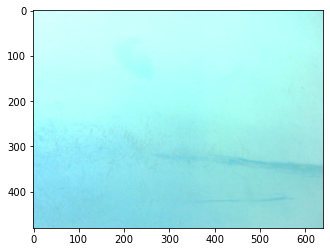

(480, 640)


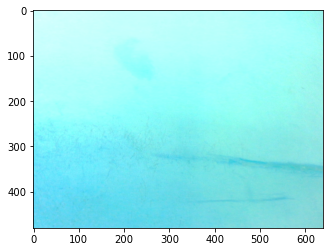

(480, 640)


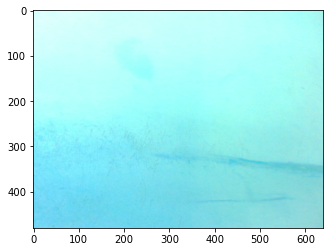

(480, 640)


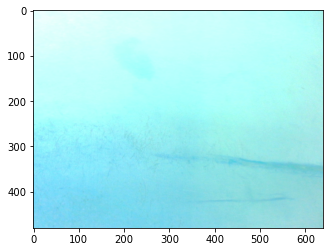

(480, 640)


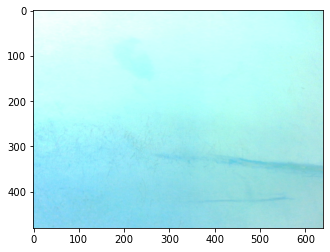

(480, 640)


In [8]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import cv2


pipeline = rs.pipeline()

# Configure the device
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

    
profile = pipeline.start(config)
    
# Get the sensor once at the beginning. (Sensor index: 1)
sensor = pipeline.get_active_profile().get_device().query_sensors()[1]

# Set the exposure anytime during the operation
sensor.set_option(rs.option.exposure, 1000)


# Only the first frame is captured in manual exposure mode with an unknown exposure value!
for i in range(5):
    frames = pipeline.wait_for_frames()
    color = np.asanyarray(frames.get_color_frame().get_data())
    depth = np.asanyarray(frames.get_depth_frame().get_data())

    #savePath = 'C:/Users/Pradeep/Documents/Robot/RGB_Img/pic{}.jpeg'.format #Replace this with your own path say /media/odroid/MYUSB/savefolder/output.jpg

    #cv2.imwrite('C:/Users/Pradeep/Documents/Robot/RGB_Img/cpic{}.jpeg'.format(i), color )
    plt.imshow(color)
    plt.show()
    print(depth.shape)
    
pipeline.stop()
    

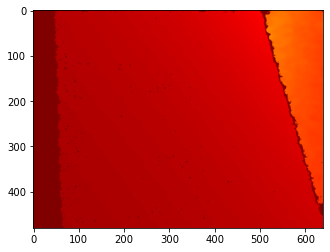

(480, 640)


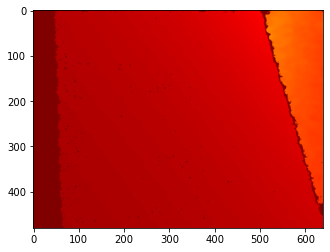

(480, 640)


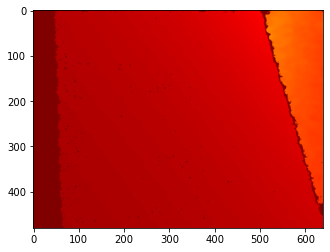

(480, 640)


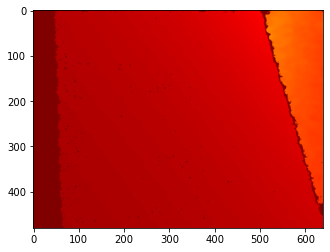

(480, 640)


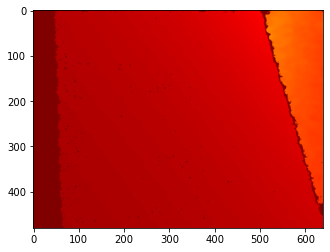

(480, 640)


In [9]:
#path = 'C:/Users/Pradeep/Documents/Robot/Depth_Img/dpic{}.jpeg'
for i in range(5):
    depthImg = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.03),cv2.COLORMAP_JET)
    #cv2.imwrite(path.format(i), depthImg )
    plt.imshow(depthImg)
    plt.show()
    print(depth.shape)
    


In [1]:
def rectangleShape(depth):

    # Start coordinate
    # represents the top left corner of rectangle
    start_point = (170, 90)

    # Ending coordinate
    # represents the bottom right corner of rectangle
    end_point = (470, 390)

    # Blue color in BGR
    colors = (0, 0, 0)

    # Line thickness of 2 px
    thicknes = 2

    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    images = cv2.rectangle(depth, start_point, end_point, colors, thicknes)

    #plt.imshow(images)

In [2]:

def ROI(depth):

    roi = depth[90:390, 170:470]

    #print(roi.shape)

    #plt.imshow(roi)

    minmum = np.min(roi[np.nonzero(roi)])
    #maximum = np.max(roi[np.nonzero(roi)])
    #print(minmum)
    #print(maximum)

    cormin = np.where(roi == minmum)
    #cormax = np.where(roi == maximum)
    
    
    crop = depth[90:390, 170:470]
    #print(crop.shape)
    #plt.imshow(crop)

    # coordinates
    mincoordinates = (cormin[1][0], cormin[0][0])
    #maxcoordinates = (cormax[1][0], cormax[0][0])

    # Radius of circle
    radius = 10

    # Blue color in RGB
    mincolor = (0, 255, 0)
    #maxcolor = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 20
    

    image = cv2.circle(crop, mincoordinates, radius, mincolor, thickness)
    #image = cv2.circle(crop, maxcoordinates, radius, maxcolor, thickness)

    # Displaying the image
    #print(end = "\n"+'Red point min depth point & Green point max depth point')
    #plt.imshow(color)


    #print(cormin[0], cormin[1])
    #print(cormax[0], cormax[1])



In [ ]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import cv2



pipeline = rs.pipeline()

# Configure the device
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

    
profile = pipeline.start(config)
    
# Get the sensor once at the beginning. (Sensor index: 1)
sensor = pipeline.get_active_profile().get_device().query_sensors()[1]

# Set the exposure anytime during the operation
sensor.set_option(rs.option.exposure, 1000)


# Only the first frame is captured in manual exposure mode with an unknown exposure value!
while True:
    frames = pipeline.wait_for_frames()
    color = np.asanyarray(frames.get_color_frame().get_data())
    depth = np.asanyarray(frames.get_depth_frame().get_data())

    #savePath = 'C:/Users/Pradeep/Documents/Robot/RGB_Img/pic{}.jpeg'.format #Replace this with your own path say /media/odroid/MYUSB/savefolder/output.jpg

    #cv2.imwrite('C:/Users/Pradeep/Documents/Robot/RGB_Img/cpic{}.jpeg'.format(i), color )
    #plt.imshow(color)
    #plt.show()
    
    
    rectangleShape(depth)
    ROI(depth)
    
    depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.03),cv2.COLORMAP_JET)
    
    
    images = np.hstack((color, depth_colormap))

    cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
    cv2.imshow('RealSense', images)
    cv2.waitKey(1)
       
    
pipeline.stop()
    

In [231]:
mindepth = np.min(depth[np.nonzero(depth)])
maxdepth = np.max(depth[np.nonzero(depth)])

print(depth.shape)
print(mindepth)
print(maxdepth)
#print(depth)

mincor = np.where(depth == mindepth)
maxcor = np.where(depth == maxdepth)

print(mincor[0], mincor[1])
print(maxcor[0], maxcor[1])

(480, 640)
370
2057
[473 473 473 473 474 474 474 474 474 474 475 475 475 475 475 475 475 475
 476 476 476 476 476 476 476 477 477 477 477 477 477 477 477 478 478 478
 478 478 478 478 478 479 479 479 479 479 479] [59 60 62 63 59 60 61 62 63 64 57 58 59 60 61 62 63 64 58 59 60 61 62 63
 64 58 59 60 61 62 63 64 65 59 60 61 62 63 64 65 66 60 61 62 63 64 65]
[16 17] [550 551]


In [9]:
def minmaxpoint(color):
    
    crop = color[90:390, 170:470]
    #print(crop.shape)
    #plt.imshow(crop)

    # coordinates
    mincoordinates = (cormin[1][0], cormin[0][0])
    maxcoordinates = (cormax[1][0], cormax[0][0])

    # Radius of circle
    radius = 4

    # Blue color in RGB
    mincolor = (0, 255, 0)
    maxcolor = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 10

    image = cv2.circle(crop, mincoordinates, radius, mincolor, thickness)
    image = cv2.circle(crop, maxcoordinates, radius, maxcolor, thickness)

    # Displaying the image
    #print(end = "\n"+'Red point min depth point & Green point max depth point')
    #plt.imshow(color)




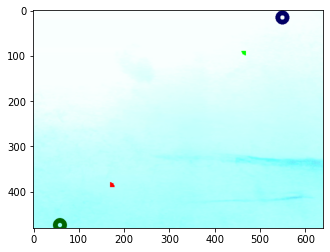

In [245]:
# Center coordinates
mincoordinates = (mincor[1][0], mincor[0][0])
maxcoordinates = (maxcor[1][0], maxcor[0][0])

# Radius of circle
radius = 10  
  
# Blue color in BGR
mincolor = (0, 100, 0)
maxcolor = (0, 0, 100)
  
# Line thickness of 2 px
thickness = 10

image = cv2.circle(color, mincoordinates, radius, mincolor, thickness)
image = cv2.circle(color, maxcoordinates, radius, maxcolor, thickness)
  
# Displaying the image
plt.imshow(image)



In [ ]:
def rectangleShape(temp_depth):

    # Start coordinate
    # represents the top left corner of rectangle
    start_point = (170, 90)

    # Ending coordinate
    # represents the bottom right corner of rectangle
    end_point = (470, 390)

    # Blue color in BGR
    colors = (0, 0, 0)

    # Line thickness of 2 px
    thicknes = 2

    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    images = cv2.rectangle(temp_depth, start_point, end_point, colors, thicknes)

    #plt.imshow(images)
    
    return images
    
########################################################################################
########################################################################################
def ROI(temp_depth):
    
    minpixel = 20000

    roi = temp_depth[90:390, 170:470]

    minmum = np.min(roi[np.nonzero(roi)])
    #maximum = np.max(roi[np.nonzero(roi)])

    mincor = np.where(roi == minmum)
#     print("###########################################################")
#     print("###########################################################")
#     print("###########################################################")
#     print(len(mincor[0]),mincor[0])
#     print(len(mincor[1]),mincor[1])
    
        
    #maxcor = np.where(roi == maximum)
        
    point_y, point_x = mincor[1][0]+170, mincor[0][0]+90
    mincoordinates = (point_y, point_x)
    
    radius = 5

    mincolor = (255, 255, 255)

    thickness = 5
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    fontScale = 1
    color = (255, 0, 0)

    image = cv2.circle(temp_depth, mincoordinates, radius, mincolor, thickness)
    image = cv2.putText(image, '{} {} '.format(minmum, mincoordinates), org, font, fontScale, mincolor, 2, cv2.LINE_AA)
    
    return image
    
########################################################################################
########################################################################################
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import cv2
##################################################
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
pipeline.start(config)
##################################################
while True:    
    frames = pipeline.wait_for_frames()
    color = np.asanyarray(frames.get_color_frame().get_data())
    depth = np.asanyarray(frames.get_depth_frame().get_data())
    ##################################################
    
    depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.03),cv2.COLORMAP_JET)
    image_2 = rectangleShape(depth_colormap)
    image_3 = ROI(image_2)
    
    images = np.hstack((color, image_3))

    cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
    cv2.imshow('RealSense', images)
    cv2.waitKey(1)
       
    
pipeline.stop()
    

In [ ]:

    # First import the library
    import pyrealsense2 as rs
    import  sys, getopt
    def read_parameters(argv):
        opts, args = getopt.getopt(argv, "i:", ["ifile="])
        jcnt = ''
        size = 0

        if len(opts) > 0:
            json_file = opts[0][1]
            file_object = open(json_file)
            jcnt = file_object.read()
            size = len(jcnt)
            return size, jcnt

    def main(argv):

        size, file_cnt = read_parameters(argv)

        pipeline = rs.pipeline()
        config = rs.config()

        # Get device product line for setting a supporting resolution
        pipeline_wrapper = rs.pipeline_wrapper(pipeline)
        pipeline_profile = config.resolve(pipeline_wrapper)
        device = pipeline_profile.get_device()

        auto_calibrated_device = rs.auto_calibrated_device(device)

        if not auto_calibrated_device:
            print("The connected device does not support auto calibration")
           # return


        config.enable_stream(rs.stream.depth, 256, 144, rs.format.z16, 90)
        conf = pipeline.start(config)
        calib_dev = rs.auto_calibrated_device(conf.get_device())

    def on_chip_calib_cb(progress):
        print(". ")

    while True:
        try:
            operation = input("Please select what the operation you want to do\nc - on chip calibration\nt - tare calibration\ng - get the active calibration\nw - write new calibration\ne - exit\n")

            if operation == 'c':
                print("Starting on chip calibration")
                new_calib, health = calib_dev.run_on_chip_calibration(file_cnt, on_chip_calib_cb, 5000)
                print("Calibration completed")
                print("health factor = ", health)

            if operation == 't':
                print("Starting tare calibration")
                ground_truth = float(input("Please enter ground truth in mm\n"))
                new_calib, health = calib_dev.run_tare_calibration(ground_truth, file_cnt, on_chip_calib_cb, 5000)
                print("Calibration completed")
                print("health factor = ", health)

            if operation == 'g':
                calib = calib_dev.get_calibration_table()
                print("Calibration", calib)

            if operation == 'w':
                print("Writing the new calibration")
                calib_dev.set_calibration_table(new_calib)
                calib_dev.write_calibration()

#             if operation == 'e':
#                 pipeline.stop()
#                 return

            print("Done\n")
        except Exception as e:
            print(e)
        except:
            print("A different Error")




    if __name__ == "__main__":
        main(sys.argv[1:])

Please select what the operation you want to do
c - on chip calibration
t - tare calibration
g - get the active calibration
w - write new calibration
e - exit
c
Starting on chip calibration
name 'calib_dev' is not defined
Please select what the operation you want to do
c - on chip calibration
t - tare calibration
g - get the active calibration
w - write new calibration
e - exit
t
Starting tare calibration
Please enter ground truth in mm
200
name 'calib_dev' is not defined
